In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
import pandas as pd
from sklearn import metrics

# Multiple ensembles shown to work

In [12]:
# 导入数据

df_data = pd.read_csv('ozone_eighthr.csv')
df_data.replace(['?'],[-9999], inplace =True)
df_data.fillna(-9999, inplace =True)

df_data.pop('Date')
label = df_data.pop('Orzone').values
data = df_data.values
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=22)

In [17]:
# 三个基学习器
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
# 投票分类器
voting_clf = VotingClassifier( estimators=[("lr", log_clf), ("rf", rf_clf), ("svc", svm_clf)], voting='soft' )
# voting_clf.fit( X_train, y_train )

# 假正率、真正率
fpr = []
tpr = []

for clf in ( log_clf, rf_clf, svm_clf, voting_clf ):
    clf.fit( X_train, y_train )
    y_pred = clf.predict( X_test )
    print( clf.__class__.__name__,'accuracy is ', accuracy_score(y_test, y_pred) )
    
    y_score = clf.predict_proba(X_test)[:, 1]   
    print(clf.__class__.__name__, 'auc is ', roc_auc_score(y_test,y_score))
    
    fpr.append(roc_curve(y_test, y_score)[0])
    tpr.append(roc_curve(y_test, y_score)[1])

/home/ming/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ming/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ming/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ming/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LogisticRegression accuracy is  0.9250985545335085
LogisticRegression auc is  0.6568442558541568
RandomForestClassifier accuracy is  0.938239159001314
RandomForestClassifier auc is  0.8384802765990885
SVC accuracy is  0.9290407358738502
SVC auc is  0.4684242233747184


/home/ming/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ming/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ming/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier accuracy is  0.9290407358738502
VotingClassifier auc is  0.8245062601498245


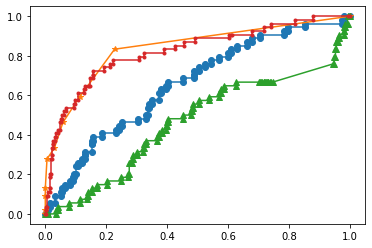

In [19]:
import matplotlib.pyplot as plt
plt.plot(fpr[0], tpr[0], marker = 'o') 
plt.plot(fpr[1], tpr[1], marker = '*') 
plt.plot(fpr[2], tpr[2], marker = '^') 
plt.plot(fpr[3], tpr[3], marker = '.') 
plt.show()

# Interaction between hyperparameters and ensemble composition